#  Simulating interferometric sensing of a quantum superposition of enantiomer states

|||
|-|-|
|**Authors:** |Taha Selim, Alain Chancé|
|**Date:** |June 23, 2023|
|**Version:** |**1.00**<br/>*Details see at the end of this notebook*|
|**References:**|
[Prof. Gerrit C. Groenenboom, Quantum theoretical chemistry (NWI-MOL112), May 26, 2023](https://www.theochem.ru.nl/ctc2/pdf/qtclecture.pdf)
[Prof. Gerrit C. Groenenboom, Computational and Theoretical Chemistry 2, NWI-MOL176 (3EC)](https://www.theochem.ru.nl/ctc2/)
[Keeper L. Sharkey, Alain Chancé, Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code, ISBN-13: 978-1803243900](https://www.amazon.com/Quantum-Chemistry-Computing-Curious-Illustrated/dp/1803243902/)


# MIT License

Copyright (c) 2023 Taha Selim, Alain Chancé

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

Some code in this Jupyter notebook is derived from the cutdown companion Jupyter Notebook of Chapter 3, Quantum Circuit Model of Computation, of the book titled:
"Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code" [Sharkey] which is published on the following public GitHub repository:
https://github.com/PacktPublishing/Quantum-Chemistry-and-Computing-for-the-Curious/blob/main/Chapter_03_Quantum_circuit_model_of_computation.ipynb

In [2]:
using Plots # or StatsPlots
using LinearAlgebra
using SpecialFunctions
using AssociatedLegendrePolynomials
using LaTeXStrings

## Include files
### Include lib_load.jl which loads common modules with includes

In [5]:

# import conventions
include("conventions.jl")
  using .conventions: big_endian, qubit_begin

  # import quantum gates
include("quantum_gates.jl")
using ..quantum_gates: Qgate, Rz_gate1

include("lib_tensor/QTensor.jl")
using ..QTensor: Qgate_T2D


include("lib_useful/custom_functions.jl")
using ..custom_functions: MK_sortrows

include("quantum_circuit.jl")
using ..quantum_circuit: qc_init, init_register, show_statevector, op
#using ..quantum_circuit: qc_init, init_register, print_initstate

Load quantum gates constructor


Load Tensor module: QTensor.jl
Load quantum gates constructor


Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load quantum_circuit constructor


# Enantiomers
In chemistry, molecules or ions that are mirror images of each other are called enantiomers or optical isomers. If these images are non-superimposable, they are called chiral molecules [ChemChiral] and they differ in their ability to rotate plane polarized light either to the left or to the right [Wonders]. One is called the (S) enantiomer, and the other the (R) enantiomer. The (R) and (S) assignments are designated via the Cahn-Ingold-Prelog convention. 

Optically active compounds which rotate plane polarized light clockwise (dextrorotatory) are designated (+) or d.

Optically active compounds which rotate plane polarized light counterclockwise (levorotatory) are designated (-) or l.

There is no relationship between (R) and (S) and the direction of the rotation of plane polarized light. 

## (S)-Alanine and (R)-alanine
In the following figure, the naturally occurring amino acid, (S)-Alanine is depicted on the left, and its enantiomer (R)-alanine is on the right [Wade].

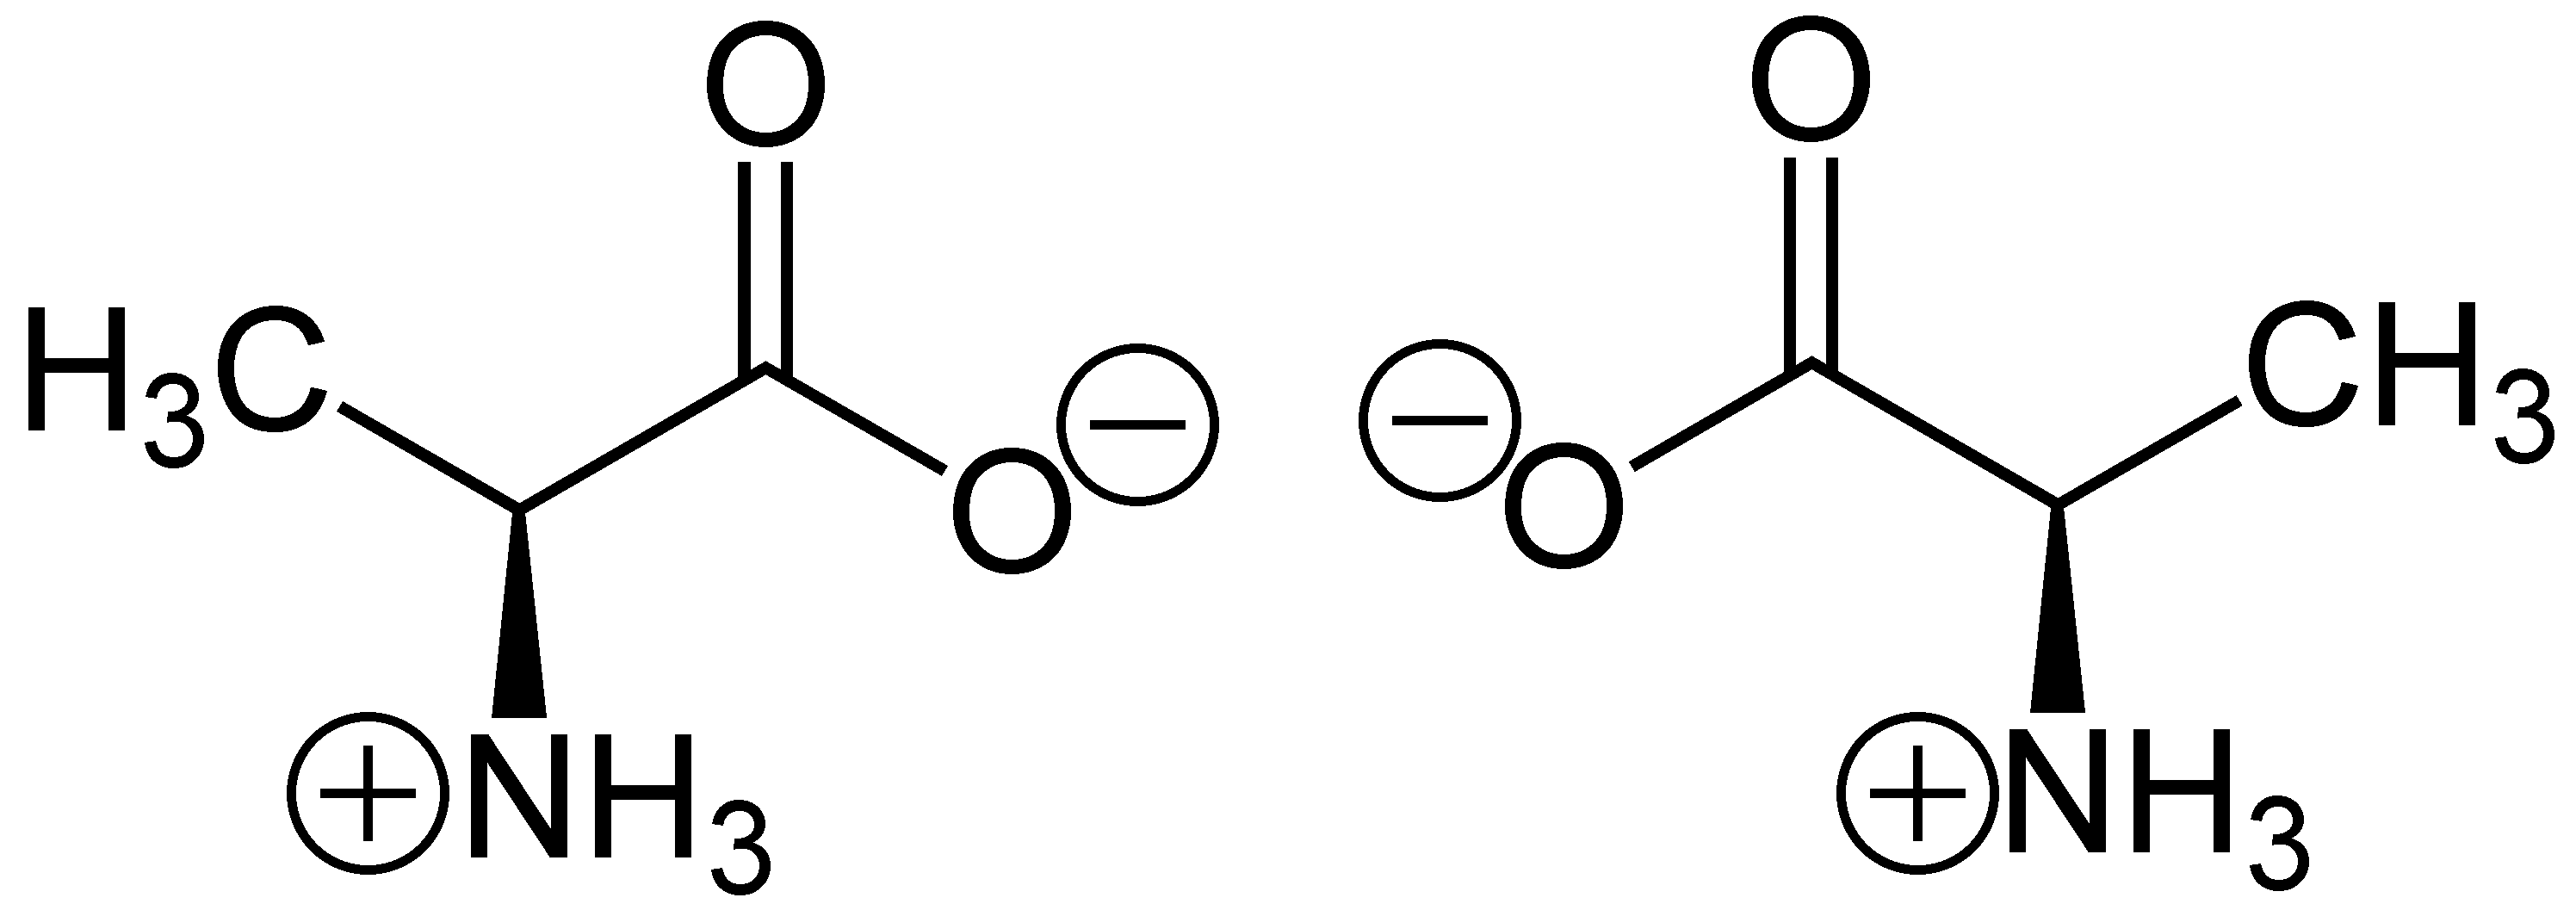

(S)-Alanine (left) and (R)-alanine (right) in zwitterionic form at neutral pH, Jü, Public domain, via Wikimedia Commons
https://upload.wikimedia.org/wikipedia/commons/4/4a/Zwitterion-Alanine.png

## Creating a function plot_mol3D() that plots a 3D view of a molecule retrieved from PubChem
PubChem is a free and publicly available resource containing substance descriptions and their associated biological activity information.

(S)-Alanine = L-analine: https://pubchem.ncbi.nlm.nih.gov/compound/Alanine 

(R)-Alanine = D-analine: https://pubchem.ncbi.nlm.nih.gov/compound/D-alanine

## Preparing a quantum superposition of left- and right-handed states of enantiomers

Researchers have proposed an experiment to prepare a quantum superposition of left- and right-handed states of enantiomers. Performing interferometric sensing of chirality-dependent forces could be used to measure enantiomer-dependent forces due to nearby surfaces, other chiral molecules, or optical fields with unprecedented accuracy [Stickler]. 

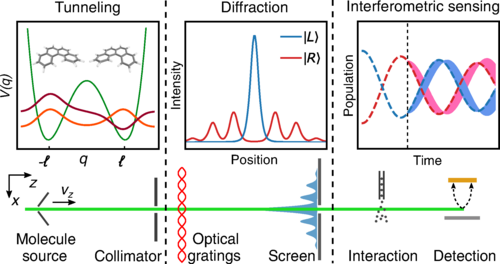

Proposed setup to generate quantum superpositions of enantiomers and exploit their tunneling dynamics for interferometric sensing. A racemic beam of chiral molecules is diffracted from optical gratings and filtered at the detection screen. Left inset: During the transit, the molecules continuously tunnel between left- and right-handed molecular configurations. Middle inset: Adjusting the grating phases prepares superpositions of enantiomer states. Right inset: The resulting tunneling dynamics can be observed and exploited in subsequent beam experiments. Source: Benjamin A. Stickler, Mira Diekmann, Robert Berger, and Daqing Wang, Phys. Rev. X 11, 031056, DOI:https://doi.org/10.1103/PhysRevX.11.031056, Figure 1, 14 September 2021, Creative Commons Attribution 4.0 International license.

A racemic mixture is a 50:50 mixture of two enantiomers [Racemic].

# Qubits and quantum gates
## Qubits
A qubit is a quantum unit of information that represents a two-level quantum system and lives in a two-dimensional Hilbert space $\mathbb C^2$. The computational basis states of the quantum space are denoted as $\{|0\rangle,|1\rangle\}$:

$$|0\rangle=\left(\begin{array}{l}
1 \\
0
\end{array}\right) 
|1\rangle=\left(\begin{array}{l}
0 \\
1
\end{array}\right)$$

Any single-qubit state is described by a linear superposition of the computational basis with complex coefficients:  
$$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle=\left(\begin{array}{l}
\alpha \\
\beta
\end{array}\right) \in \mathbb{C}^{2}$$

where 𝛼 and 𝛽 satisfy:
$$|\alpha|^{2}+|\beta|^{2}=1$$

A qubit is in a quantum superposition during the execution of an algorithm.  When it is measured in the computational basis, a qubit will be found in either state $|0\rangle$ or in state $|1\rangle$ with probability $|\alpha|^{2}$ and $|\beta|^{2}$ respectively. If there are $n$ qubits in the system, the state is described by a vector in the $2^n$ dimensional Hilbert space $(\mathbb{C}^2)^{⊗n}$ formed by taking the tensor product of the Hilbert spaces of the individual qubits. For example, for 10 qubits, the state is described by a vector in a 1024-dimensional Hilbert space. 

## Tensor ordering of qubits
The physics community typically orders a tensor product of $n$ qubits with the first qubit on the left-most side of the tensor product: 

$$|q\rangle=\left|q_{0}\right\rangle\left|q_{1}\right\rangle \ldots\left|q_{n-1}\right\rangle=\left|q_{0}, q_{1}, \ldots, q_{n-1}\right\rangle=\bigotimes_{i=0}^{n-1}\left|q_{i}\right\rangle$$

However, Qiskit uses an ordering in which the $n^{th}$ qubit is first in the order and the $0^{th}$ qubit is last:

$$|q\rangle=
\left|q_{n-1}\right\rangle\ldots\left|q_{1}\right\rangle\left|q_{0}\right\rangle
=\left|q_{n-1}, \ldots, q_{1}, q_{0}\right\rangle
=\bigotimes_{i=n-1}^{0}\left|q_{i}\right\rangle$$

In other words, if qubit $0$ is in state $|0\rangle$, qubit $1$ is in state $|0\rangle$, and qubit 2 is in state $|1\rangle$, the state represented in many physics textbooks as $|001\rangle$ is represented by Qiskit as $|100\rangle$. This difference affects the way multi-qubit operations are represented as matrices.

## Single qubit quantum gates
A single qubit quantum gate $U$ has a $(2\times2)$ unitary matrix form: $U^\dagger U=UU^\dagger= 1$.

### X Gate
An X gate maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. For classical computing, the NOT gate changes a 0 to a 1 and a 1 to a 0.

$$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$$

### H Gate
A Hadamard gate maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$ which is also written as $|+\rangle$ and $|1\rangle$ to $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$ which is also written as $|-\rangle$. A measurement of the state $|+\rangle$ or of the state $|-\rangle$ will have equal probabilities of being $0$ or $1$, creating a superposition of states.

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$$

## Two qubits quantum gates
A two qubits gate $U$ has a 4x4 unitary matrix form, $U^\dagger U=UU^\dagger= 1$.

### Controlled Not (CNOT, CX) Gate

If the first qubit is |1⟩ it performs the Pauli-X (NOT) operation on the second qubit, otherwise it leaves it unchanged

With the tensor ordering of qubits used in most physics textbooks:

$$CX = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \end{pmatrix}$$

With Qiskit tensor ordering of qubits:

$$CX = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
\end{pmatrix}$$

Let's check this result with the unitary simulator:

In [6]:
qubits = 2
control_qubit = 0
target_qubit = 1

1

In [7]:
# Hadamard gate
Hgate = Qgate.H

2×2 Matrix{Float64}:
 0.707107   0.707107
 0.707107  -0.707107

In [8]:
# Call CX gate with CX_gate(q_control::Int64,q_target::Int64, 
#    big_endian::Bool=conventions.big_endian)

# big-endian 
CX_gate_be = Qgate.CX(0,1) 

4×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0

In [9]:
# little-endian 
CX_gate_le = Qgate.CX(0,1,false) 

4×4 Matrix{Int64}:
 1  0  0  0
 0  0  0  1
 0  0  1  0
 0  1  0  0

# Designing a quantum circuit inspired by the interferometer involving enantiomers
## Encoding enantiomer states
We represent a single enantiomer with two qubits:
- the handedness qubit $|q_0\rangle$
- the direction of propagation qubit $\left|q_{1}\right\rangle$

### Handedness qubit $|q_0\rangle$
We encode the following:

$$\begin{array}{|c|c|}
\hline
\text{State } |q_0\rangle&\text{Handedness}\\
\hline
|0\rangle&\text{left}\\
\hline
|1\rangle&\text{right}\\
\hline
|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)&\text{superposition of left- and right-handed}\\
\hline
\end{array}$$

### Direction of propagation qubit $\left|q_{1}\right\rangle$
We encode the direction of propagation as follows:

$$\begin{array}{|c|c|}
\hline
\text{State } |q_1\rangle&\text{Direction}\\
\hline
|0\rangle&\text{horizontal}\\
\hline
|1\rangle&\text{vertical}\\
\hline
|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)&\text{superposition of horizontal and vertical}\\
\hline
\end{array}$$

### Computational basis states
The following table shows the meaning of each computational basis state:

$$\begin{array}{|c|c|c|c|c|}
\hline
\text{State } |q_1q_0\rangle&|q_0\rangle&\text{Handedness}&|q_1\rangle&\text{Direction}\\
\hline
|00\rangle&0&\text{left}&0&\text{horizontal}\\
\hline
|01\rangle&1&\text{right}&0&\text{horizontal}\\
\hline
|10\rangle&0&\text{left}&1&\text{vertical}\\
\hline
|11\rangle&1&\text{right}&1&\text{vertical}\\
\hline
\end{array}$$

## Simulating interactions of enantiomers with a beam splitter
### Simulating a beam splitter
We simulate a mirror by the Pauli $\sigma_x$ matrix and a beam splitter by the matrix $1/√2 (1 + i\sigma_x)$ [Rioux]:

$$\sigma_x = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
$$

$$\frac{1}{\sqrt{2}}\left(\mathbb{1}+i \sigma_{x}\right)=\frac{1}{\sqrt{2}}\left(\left(\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right)+i\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)\right)=\frac{1}{\sqrt{2}}\left(\begin{array}{ll}
1 & i \\
i & 1
\end{array}\right)$$

By convention, a phase shift of $\pi/2$ is assigned to reflection. From the preceding unitary matrix, we create a beam splitter gate named BS with the following Qiskit code:

In [10]:
# First test, initialize the qubit register to |0>
# Creating a beam splitter gate for Hilbert space of a single qubit
nqubits = 1
qc = qc_init(nqubits)


Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, [1.0, 0.0], [0, 1])

In [11]:
show_statevector(qc)

1.0 * | [0]>
0.0 * | [1]>


### Enantiomer moving horizontally

In [12]:
# Define the beam splitter gate
BS = (1/sqrt(2))* [1 1im; 1im 1]

2×2 Matrix{ComplexF64}:
 0.707107+0.0im            0.0+0.707107im
      0.0+0.707107im  0.707107+0.0im

In [14]:
# apply the BS gate to the qubit register
op(qc,BS)

Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, ComplexF64[0.7071067811865475 + 0.0im, 0.0 + 0.7071067811865475im], [0, 1])

In [15]:
show_statevector(qc)

0.7071067811865475 + 0.0im * | [0]>
0.0 + 0.7071067811865475im * | [1]>


The enantiomer moving horizontally, represented by $\left|q_{1}\right\rangle=|0\rangle$ has been put by the beam splitter in the state $|q_{1}\rangle=\frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle)$, a superposition of the states moving horizontally and moving vertically with a phase shift of $\pi/2$.

### Enantiomer moving vertically

In [16]:
# Initialize a qubit register to |0>
nqubits = 1
qc = qc_init(nqubits)


Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, [1.0, 0.0], [0, 1])

In [17]:
show_statevector(qc)

1.0 * | [0]>
0.0 * | [1]>


In [18]:
# define the X-gate 
Xgate = Qgate.X

2×2 Matrix{Float64}:
 0.0  1.0
 1.0  0.0

In [20]:
op(qc,Xgate)

Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, [0.0, 1.0], [0, 1])

In [21]:
show_statevector(qc)

0.0 * | [0]>
1.0 * | [1]>


In [22]:
op(qc,BS)

Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, ComplexF64[0.0 + 0.7071067811865475im, 0.7071067811865475 + 0.0im], [0, 1])

In [23]:
show_statevector(qc)

0.0 + 0.7071067811865475im * | [0]>
0.7071067811865475 + 0.0im * | [1]>


The enantiomer moving vertically, represented by $\left|q_{1}\right\rangle=|1\rangle$ has been put by the beam splitter in the state $|q_{1}\rangle=\frac{1}{\sqrt{2}}(i|0\rangle+|1\rangle)$, a superposition of the states moving horizontally with a phase shift of $\pi/2$ and moving vertically.

## Simulating interactions of enantiomers with a polarizing beam splitter
### Simulating a polarizing beam splitter
We simulate a polarizing beam splitter (PBS) which transmits left-handed and reflects right-handed states with the matrix PBS [Rioux].

$$PBS = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
\end{pmatrix}$$

Unlike the beam splitter, there is no phase change on reflection. The PBS gate is the same as the controlled Not (CNOT, CX) Gate using Qiskit tensor ordering of qubits. From the preceding unitary matrix, we create a polarizing beam splitter gate named PBS with the following code:

In [25]:
# Initialize a qubit register to |00>
nqubits = 2
qc_be = qc_init(nqubits)
qc_le = qc_init(nqubits,false)

Main.quantum_circuit.qc_initstruct(2, "little-endian", 2, 4, [1.0, 0.0, 0.0, 0.0], [0.0 0.0; 1.0 0.0; 0.0 1.0; 1.0 1.0])

In [27]:
# CX_gate_le
op(qc_le,CX_gate_le)

Main.quantum_circuit.qc_initstruct(2, "little-endian", 2, 4, [1.0, 0.0, 0.0, 0.0], [0.0 0.0; 1.0 0.0; 0.0 1.0; 1.0 1.0])

In [28]:
show_statevector(qc_le)

1.0 * | [0, 0]>
0.0 * | [0, 1]>
0.0 * | [1, 0]>
0.0 * | [1, 1]>


In [30]:
# CX_gate_be
op(qc_be,CX_gate_be)

Main.quantum_circuit.qc_initstruct(2, "big-endian", 2, 4, [1.0, 0.0, 0.0, 0.0], [0.0 0.0; 0.0 1.0; 1.0 0.0; 1.0 1.0])

In [31]:
show_statevector(qc_be)

1.0 * | [0, 0]>
0.0 * | [0, 1]>
0.0 * | [1, 0]>
0.0 * | [1, 1]>


The enantiomer moving horizontally and in the left handed state, represented by $|q_1q_0\rangle=|00\rangle$, using Qiskit tensor ordering of qubits, has been transmitted in the horizontal direction of propagation by the polarizing beam splitter, represented by $|q_1q_0\rangle=|00\rangle$.

### Enantiomer moving horizontally and in the left-handed state
We simulate the action of a polarizing beam splitter on an enantiomer moving horizontally and in the left-handed state with the following code:

In [46]:
# Initialize a qubit register to |00>
nqubits = 2
qc_le = qc_init(nqubits,false)
qc_be = qc_init(nqubits)

Main.quantum_circuit.qc_initstruct(2, "big-endian", 2, 4, [1.0, 0.0, 0.0, 0.0], [0.0 0.0; 0.0 1.0; 1.0 0.0; 1.0 1.0])

In [47]:
show_statevector(qc_le)

1.0 * | [0, 0]>
0.0 * | [0, 1]>
0.0 * | [1, 0]>
0.0 * | [1, 1]>


In [48]:
# Construct the X gate in a Hilbert space of two qubits 
Xgate = Qgate.X

2×2 Matrix{Float64}:
 0.0  1.0
 1.0  0.0

In [60]:

X_le = Qgate_T2D(Xgate, 0, 2,false)
X_be = Qgate_T2D(Xgate, 0, 2)

4×4 Matrix{Float64}:
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0

In [50]:

op(qc_le,X_le)


Main.quantum_circuit.qc_initstruct(2, "little-endian", 2, 4, [0.0, 0.0, 1.0, 0.0], [0.0 0.0; 1.0 0.0; 0.0 1.0; 1.0 1.0])

In [51]:
show_statevector(qc_le)

0.0 * | [0, 0]>
1.0 * | [0, 1]>
0.0 * | [1, 0]>
0.0 * | [1, 1]>


In [42]:
# Xgate = Qgate.X
# CX_gate_le = Qgate.CX(0,1,false)

4×4 Matrix{Int64}:
 1  0  0  0
 0  0  0  1
 0  0  1  0
 0  1  0  0

### Note: instead of applying the X-gate to the control qubit, we initialize directly the control qubit to |1> and the target qubit to |0>

In [61]:
nqubits = 2
qc_le = qc_init(nqubits, false)
op(qc_le,X_le)

#op(qc_le, CX_gate_le)
show_statevector(qc_le)


0.0 * | [0, 0]>
1.0 * | [0, 1]>
0.0 * | [1, 0]>
0.0 * | [1, 1]>


In [62]:
op(qc_le, CX_gate_be)
#op(qc_le, CX_gate_le)
show_statevector(qc_le)
# cell 36 in the original notebook

0.0 * | [0, 0]>
0.0 * | [0, 1]>
0.0 * | [1, 0]>
1.0 * | [1, 1]>


The enantiomer moving horizontally and in the left handed state, represented by $|q_1q_0\rangle=|00\rangle$, using Qiskit tensor ordering of qubits, has been transmitted in the horizontal direction of propagation by the polarizing beam splitter, represented by $|q_1q_0\rangle=|00\rangle$.

### Enantiomer moving horizontally and in the right-handed state

We simulate the action of a polarizing beam splitter on an enantiomer moving horizontally and in the right-handed state with the following Qiskit code:

In [68]:
nqubits = 2
Hgate = Qgate.H
Hgate_le = Qgate_T2D(Hgate, 0, 2,false)

#qc_le = qc_init(nqubits, false)


4×4 Matrix{Float64}:
 0.707107  0.0        0.707107   0.0
 0.0       0.707107   0.0        0.707107
 0.707107  0.0       -0.707107  -0.0
 0.0       0.707107  -0.0       -0.707107

In [69]:
qc_le = qc_init(nqubits, false)


Main.quantum_circuit.qc_initstruct(2, "little-endian", 2, 4, [1.0, 0.0, 0.0, 0.0], [0.0 0.0; 1.0 0.0; 0.0 1.0; 1.0 1.0])

In [70]:
op(qc_le,Hgate_le)


Main.quantum_circuit.qc_initstruct(2, "little-endian", 2, 4, [0.7071067811865475, 0.0, 0.7071067811865475, 0.0], [0.0 0.0; 1.0 0.0; 0.0 1.0; 1.0 1.0])

In [71]:
show_statevector(qc_le)


0.7071067811865475 * | [0, 0]>
0.7071067811865475 * | [0, 1]>
0.0 * | [1, 0]>
0.0 * | [1, 1]>


In [72]:
op(qc_le, CX_gate_be)

Main.quantum_circuit.qc_initstruct(2, "little-endian", 2, 4, [0.7071067811865475, 0.0, 0.0, 0.7071067811865475], [0.0 0.0; 1.0 0.0; 0.0 1.0; 1.0 1.0])

In [73]:
show_statevector(qc_le)

0.7071067811865475 * | [0, 0]>
0.0 * | [0, 1]>
0.0 * | [1, 0]>
0.7071067811865475 * | [1, 1]>


The enantiomer moving horizontally and in the right handed state, represented by $|q_1q_0\rangle=|01\rangle$, using Qiskit tensor ordering of qubits, has been reflected in the vertical direction of propagation by the polarizing beam splitter, represented by $|q_1q_0\rangle=|11\rangle$.

### Enantiomer moving horizontally and in a superposition of left- and right-handed states
We simulate the action of a polarizing beam splitter on an enantiomer moving horizontally and in a superposition of left- and right-handed states with the following code.

## References

[ASE_0] Atomic Simulation Environment (ASE), https://wiki.fysik.dtu.dk/ase/index.html 

[ASE_1] ASE, The Atoms object, https://wiki.fysik.dtu.dk/ase/ase/atoms.html 

[ASE_2] ASE Visualization, https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html#module-ase.visualize 

[ChemChiral] 5.1 Chiral Molecules, Chemistry LibreTexts, 5 Jul 2015, https://chem.libretexts.org/Bookshelves/Organic_Chemistry/Map%3A_Organic_Chemistry_(Vollhardt_and_Schore)/05._Stereoisomers/5.1%3A_Chiral__Molecules 

[Crockett] Christopher Crockett, Superpositions of Chiral Molecules, September 14, 2021, Physics 14, s108, https://physics.aps.org/articles/v14/s108

[Deepdata] Structure of D-alanine (C3H7NO2), https://www.molinstincts.com/structure/D-alanine-cstr-CT1002570990.html

[Groenenboom 1] Prof. Gerrit C. Groenenboom, Quantum theoretical chemistry (NWI-MOL112), May 26, 2023, https://www.theochem.ru.nl/ctc2/pdf/qtclecture.pdf

[Groenenboom 2] Prof. Gerrit C. Groenenboom, Computational and Theoretical Chemistry 2, NWI-MOL176 (3EC),https://www.theochem.ru.nl/ctc2/

[Kimball] Kimball's Biology Pages, Enantiomers (Optical Isomers), https://www.biology-pages.info/E/Enantiomers.html

[Loscrı́] Loscri, V. & Vegni, Anna Maria. (2021). Enabling molecular communication through chirality of enantiomers. ITU Journal on Future and Evolving Technologies. 2. 10.52953/UOGH5898. https://www.researchgate.net/publication/352670553_Enabling_molecular_communication_through_chirality_of_enantiomers

[NIH_1] Model ID 3DPX-001257, L-alanine, US Department of Health and Human Services, National Institutes of Health (NIH), https://3dprint.nih.gov/discover/3dpx-001257

[NIH_2] Model ID 3DPX-015280, D-alanine, US Department of Health and Human Services, National Institutes of Health (NIH), https://3dprint.nih.gov/discover/3DPX-015280

[ORCA] Calculating the optimized geometry of the amino acid alanine, https://www.orcasoftware.de/tutorials_orca/prop/geoopt.html

[Plotly] Getting Started with Plotly in Python, https://plotly.com/python/getting-started/

[PubChem_1] D-alanine, https://pubchem.ncbi.nlm.nih.gov/compound/71080

[PubChemPy] pubChemPy, https://pubchempy.readthedocs.io/en/latest/

[Qiskit] Qiskit, https://qiskit.org/ 

[QuTiP] QuTiP, Plotting on the Bloch Sphere, https://qutip.org/docs/latest/guide/guide-bloch.html 

[Racemic] 4.7: Optical Activity and Racemic Mixtures, Chemistry LibreTexts, Sep 4, 2019, https://chem.libretexts.org/Courses/Nassau_Community_College/Organic_Chemistry_I_and_II/04%3A_Stereochemistry_at_Tetrahedral_Centers/4.07%3A_Optical_Activity_and_Racemic_Mixtures

[Rioux] Frank Rioux, Mach-Zehnder Polarizing Interferometer Analyzed Using Tensor Algebra, https://faculty.csbsju.edu/frioux/photon/MZ-Polarization.pdf 

[Sharkey] Sharkey, Keeper L., and Chancé, Alain. 2022. Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit Code. Packt, Pub. ISBN-13: 978-1803243900

[Stickler] B. A. Stickler et al., Enantiomer superpositions from matter-wave interference of chiral molecules, Phys. Rev. X 11, 031056 (2021), https://journals.aps.org/prx/abstract/10.1103/PhysRevX.11.031056 

[Wade] Organic chemistry 6th edition, L.G. Wade Jr., Chapter 5 Stereochemistry, https://crab.rutgers.edu/~alroche/Ch05.pdf , https://slideplayer.com/slide/5152710/

[Wiki_1] Alanine, https://en.wikipedia.org/wiki/Alanine
Space-filling model of the zwitterionic L-alanine molecule, C3H7NO2, as found in the crystal structure determined by neutron diffraction and reported in New J. Chem. (2005) 29 1318-1322 (CSD Entry: LALNIN23). Public domain. https://en.wikipedia.org/wiki/Alanine#/media/File:L-alanine-from-xtal-Mercury-3D-sf.png

[Wonders] Optical Isomers, Enantiomers and Chiral Molecules, WondersofChemistry, https://www.youtube.com/watch?v=8TIZdWR4gIU

## Display Julia version information

In [ ]:
# Display Julia version information
versioninfo()